In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import find_peaks
np.set_printoptions(threshold=np.inf)
# schemes = ['ost_2', 'ost_3', 'ost_4', 'ost_5', 'ost_6']
# schemes = ['bppn_50', 'bppn_100', 'bppn_150', 'bppn_200', 'bppn_250']
# schemes = ['bppn_10', 'bppn_20', 'bppn_30', 'bppn_40', 'bppn_50']
schemes = ['mss_512', 'mss_1024', 'mss_2048']
# schemes = ['new_schedule','new_schedule2', 'new_schedule3', 'old_schedule']
schemes = ['new_schedule3/bppn_10', 'new_schedule3/bppn_20', 'new_schedule3/mss_512', 'new_schedule3/bppn_320', 'old_schedule/mss_512']
schemes = ['new_schedule3/mss_512']
schemes = ['new_schedule3/mss_512', 'new_schedule3/mss_2048_bppn_40', 'new_schedule3/mss_2048_bppn_80', 'new_schedule3/mss_2048_bppn_120', 'new_schedule3/mss_2048_bppn_160', 'new_schedule3/mss_2048_bppn_240', 'old_schedule/mss_512']
schemes = ['new_schedule2/mss_512', 'new_schedule2/mss_2048_bppn_40', 'new_schedule2/mss_2048_bppn_160', 'new_schedule2/mss_2048_bppn_400', 'new_schedule2/mss_2048_bppn_880', 'old_schedule/mss_512']
# schemes = ['new_schedule3/mss_512', 'new_schedule3/mss_2048_bppn_40', 'new_schedule3/mss_2048_bppn_80', 'new_schedule3/mss_2048_bppn_160', 'new_schedule3/mss_2048_bppn_320', 'new_schedule3/mss_2048_bppn_640', 'old_schedule/mss_512']
schemes = ['Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_4_bppn_5120', 'Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_8_bppn_5120', 'Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_16_bppn_5120', 'Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_32_bppn_5120', 'Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_48_bppn_5120', 'Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_64_bppn_5120', ]
# schemes = ['new_schedule3/mss_512', 'old_schedule/mss_512']
# schemes = ['onepod/mss_512', 'onepod/mss_2048']
# schemes = ['dctcp/mss_512', 'new_schedule3/mss_512']
# schemes_label = schemes 
schemes = ['Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_4_bppn_5120', 'Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_8_bppn_5120' , 'Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_16_bppn_5120', 'Zeropod/multipods_W5/new_schedule4/W5_incast/ppt_32_bppn_5120']
# schemes = ['Zeropod/multipods_W5/new_schedule4/ppt_16_bppn_1280', 'Zeropod/multipods_W5/new_schedule4/ppt_16_bppn_2560', 'Zeropod/multipods_W5/new_schedule4/ppt_16_bppn_5120']
schemes = ['Zeropod/multipods_W5/new_schedule4/W5_incast_0.001/ppt_4_bppn_2560', 'Zeropod/multipods_W5/new_schedule4/W5_incast_0.001/ppt_8_bppn_2560', 'Zeropod/multipods_W5/new_schedule4/W5_incast_0.001/ppt_16_bppn_2560', 'Zeropod/multipods_W5/new_schedule4/W5_incast_0.001/ppt_32_bppn_2560', 'Zeropod/multipods_W5/new_schedule4/W5_incast_0.001/ppt_48_bppn_2560', 'Zeropod/multipods_W5/new_schedule4/W5_incast_0.001/ppt_64_bppn_2560']
schemes_label = ['Epoch_length=4', 'Epoch_length=8', 'Epoch_length=16', 'Epoch_length=32', 'Epoch_length=48', 'Epoch_length=64']
schemes = ['Zeropod/singlepod_W5/new_schedule4/W5_incast/ppt_16', 'Zeropod/singlepod_W5/new_schedule4/W5_incast/ost_off/ppt_16_topk_16', ]
schemes_label = ["on", "off",]
# schemes_label = ["2x_recdelay_10_up_40"]
# schemes = ['/Zeropod/multipods_W5/optical-oobcp/2x_recdelay_10_up_40']
# reverse the schemes
# schemes = schemes[::-1]
# schemes = schemes[1:5]
# workloads = ["W5_0.1", "W5_0.25", "W5_0.5", "W5_0.75", "W5_1"]
# labels = ["10", "25", "50", "75", "100"]
workloads = ["W5_0.1"]
labels = ["10"]
# workloads = ["W5_1"]
# labels = ["100"]

# workloads = ["W4_0.1", "W4_0.25", "W4_0.5", "W4_0.75", "W4_1"]
# labels = ["10", "25", "50", "75", "100"]
# workloads = ["W5_0.1"]
# labels = ["10"]

metrics = ['FCT', 'GOODPUT']

# labels = ['10', '25', '50', '75', '100']
# labels = ['2', '3', '4', '5', '6']

my_figsize = [20, 12]
my_fontsize = 55
colors = ['firebrick', 'darkblue']
WIDTH = 0.03  # the width of the bars
SHORT = 3000  # 100KB
LONG = 1000000 # 1MB

data = {}
for scheme in schemes:
    data[scheme] = {}
    for workload in workloads:
        data[scheme][workload] = {}

for scheme in schemes:
    for workload in workloads:
        for metric in metrics:
            file_name = "../DATA/Zeropod/{scheme}/DATA_zeropod_{workload}/{metric}.txt".format(scheme=scheme, workload=workload, metric=metric)
            data[scheme][workload][metric] = np.loadtxt(file_name)

for scheme in schemes:
        for workload in workloads:
            data[scheme][workload]['SHORT_IDX'] = data[scheme][workload]['FCT'][:, 4] < SHORT
            data[scheme][workload]['LONG_IDX'] = data[scheme][workload]['FCT'][:, 4] > LONG
            data[scheme][workload]['MIDDLE_IDX'] = (data[scheme][workload]['FCT'][:, 4] >= SHORT) * (data[scheme][workload]['FCT'][:, 4] <= LONG)
            data[scheme][workload]['intra-pod'] = np.trunc(data[scheme][workload]['FCT'][:,2] / 16) == np.trunc(data[scheme][workload]['FCT'][:,3] / 16)
            data[scheme][workload]['inter-pod'] = np.trunc(data[scheme][workload]['FCT'][:,2] / 16) != np.trunc(data[scheme][workload]['FCT'][:,3] / 16)

119069.95718238322


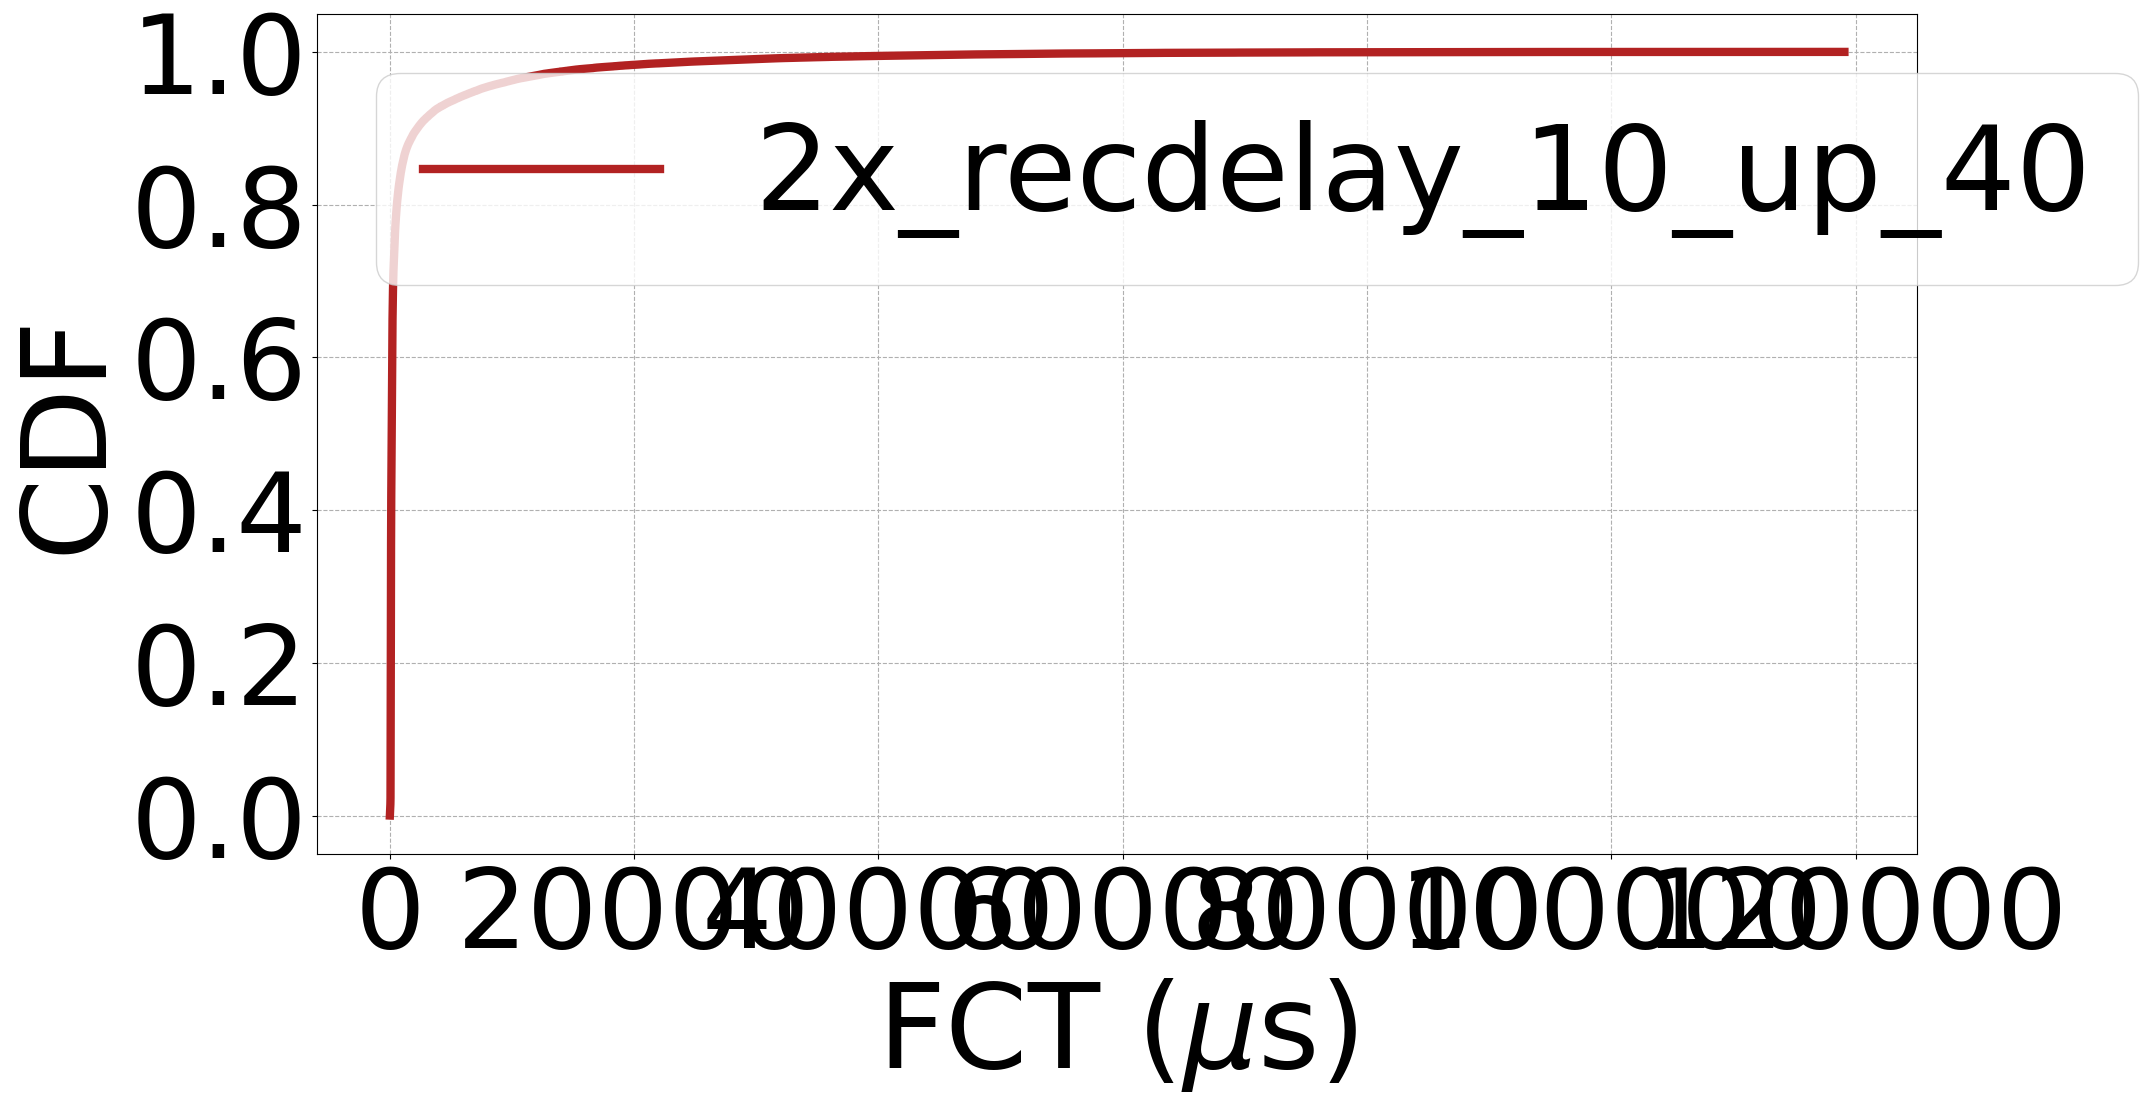

In [6]:
my_fontsize = 85
NUM_BINS = 50000
colors = ['firebrick', 'darkblue', 'yellow', 'green']
linestyles = ["solid", "--"]
def get_slowdown_percentile(x, flowsize, slowdown, percent=99):
    index = np.searchsorted(flowsize, x, side='right') - 1
    if index < 0:
        return 0
    else:
        return np.percentile(slowdown[:index+1], percent)

def fct_bar_plot(mode, labels, workload, flow_range='all', pods="all"):
    # fig, axs = plt.subplots(nrows=2, ncols=3, figsize=my_figsize)
    _, ax = plt.subplots(figsize=my_figsize)
    plt.subplots_adjust(left=0.16, right=0.96, bottom=0.2, top=0.9)
    for plot_index, workload in enumerate(workloads):
        # ax = axs[int(plot_index/3), plot_index%3]
        for i, scheme in enumerate(schemes):
            if flow_range == 'Mice':
                idx = data[scheme][workload]['SHORT_IDX']
            elif flow_range == 'Elephant':
                idx = data[scheme][workload]['LONG_IDX']
            elif flow_range == 'middle':
                idx = data[scheme][workload]['MIDDLE_IDX']
            elif flow_range == 'all':
                idx = np.arange(len(data[scheme][workload]['FCT']))

            # available_idx = data[scheme][workload]['FCT'][:, 7] > 0 # 过滤未完成的流
            if pods == "intra-pod":
                idx_xx = data[scheme][workload]['intra-pod']
                idx = idx * idx_xx
            elif pods == "inter-pod":
                idx_xx = data[scheme][workload]['inter-pod']
                idx = idx * idx_xx
            # print(sum(idx_xx))
            # idx_xx = data[scheme][workload]['intra-pod']
            
            # print(sum(idx))
            
            fct = np.array(data[scheme][workload]['FCT'][idx, 7])*1e6
            # print(max(fct))
            # 输出最小的fct及其编号
            # if workload == "W5_0.1" and i == 0:
            #     print(min(fct), np.where(fct == np.min(fct)))
            # counts, bin_edges = np.histogram(fct, bins=NUM_BINS)
            # cdf = np.cumsum(counts)
            # ax.plot(bin_edges[:-1], cdf/len(fct), label=labels[i], linewidth=3, color = colors[i])
            
            
            # 计算CDF
            sorted_data = np.sort(fct)
            if workload == "W5_0.1" and i == 0:
                print(sorted_data)
            yvals = np.arange(len(sorted_data))/float(len(sorted_data))
            

            # 绘制CDF
            ax.plot(sorted_data[1:], yvals[1:], label=labels[i], linewidth=6, color = colors[i], linestyle=linestyles[i], alpha=1)
        
        # ax.set_xticks(fontsize=my_fontsize)
        # ax.set_yticks(fontsize=my_fontsize)
        ax.tick_params(axis='both', which='major')
        # ax.set_xlim([3,30])
        # ax.set_xscale('log')
        # ax.set_yscale('log')
        
        # ax.set_xlim(0.9, 2)
        ax.grid(True, linestyle='dashed')
        # if plot_index == 3:
        ax.set_xlabel(r'FCT ($\mu$s)', fontsize=my_fontsize)
        plt.xticks(fontsize=my_fontsize-5)
        plt.yticks(fontsize=my_fontsize-5)

        ax.set_ylabel("CDF", fontsize = my_fontsize)
        # ax.set_title(workload, fontsize=my_fontsize)
        # if plot_index == 4:
        ax.legend(ncol=1, loc="upper left", fontsize=my_fontsize)
        # ax.legend(ncol=1, loc="upper right", bbox_to_anchor=(2, 1), fontsize=15)
    # axs[1,2].axis('off')
    

# fct_bar_plot("99p", labels, workloads, flow_range='Mice', pods='multipods')
# fct_bar_plot("99p", schemes_label, workloads, flow_range='Mice', pods='intra-pod')
# fct_bar_plot("99p", schemes_label, workloads, flow_range='Mice', pods='inter-pod')
fct_bar_plot("99p", schemes_label, workloads, flow_range='Mice', pods='all')
# plt.savefig(f"../FIGS/Zeropod/singlepod/os_off_CDF.pdf")